# Stellar Data Worksheet #

We can understand the empirical scaling relations seen between stars mass, luminosity and radius quite well by modelling stars. In this python worksheet you will plot these data after reading them in from a file. 

To learn more about the python in this Notebook see: 
* Astropy Tutorial on file read in: http://learn.astropy.org/rst-tutorials/plot-catalog.html
* Astropy Tutorial on fitting data: http://learn.astropy.org/rst-tutorials/Models-Quick-Fit.html
* Astropy Tutorial on Constants and Units: http://learn.astropy.org/rst-tutorials/quantities.html

In [43]:
#It's good practice in coding to keep all your input statements at the top of the code/notebook. 
#You need to run this before the code below will run
 
#Import numpy (lots of useful math stuff)
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Astropy file input/output help
from astropy.io import ascii

#Astropy model fitting
from astropy.modeling import models, fitting


In [36]:
#Load the data 'StellarData.csv'
#Notice this is a different read in method to what you saw in HW1, and produces much more 
#nicely formatted input. 
#Typing "tbl" outputs a formatted table
tbl = ascii.read("StellarData.csv")
tbl

Spectral Type,Te,L,R,M
str3,int64,float64,float64,float64
O5,44500,790000.0,15.0,60.0
O6,41000,430000.0,13.0,37.0
O8,35800,170000.0,11.0,23.0
B0,30000,52000.0,8.4,17.5
B3,18700,1900.0,4.2,7.6
B5,15400,830.0,4.1,5.9
B8,11900,180.0,3.2,3.8
A0,9520,54.0,2.7,2.9
A5,8200,14.0,1.9,2.0


In [6]:
#Typing tbl.colnames lists the column names
tbl.colnames

['Spectral Type', 'Te', 'L', 'R', 'M']

## Luminosity Mass Relation ##

In the cells below I will plot luminosity agains mass from the Stellar Data Table, and fit a relation of the form $L/L_\odot = (M/M_\odot)^\alpha$. The best way to do this is going to be to make a $\log - \log$ plot, as then we will have $\log(L/L_\odot) = \alpha \log(M/M_\odot)$, which is in the form $y=ax$ which is a straight line...

Text(0,0.5,'$L/L_\\odot$')

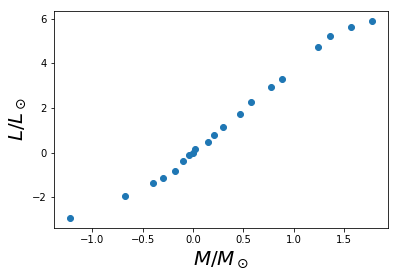

In [37]:
#Take the log of the values
x  = np.log10(tbl['M'])
y  = np.log10(tbl['L'])

plt.scatter(x,y) # plot logM vs. logL
plt.xlabel("$M/M_\odot$", fontsize=20)
plt.ylabel("$L/L_\odot$", fontsize=20)

In [38]:
#Jupyter Saves variables between cells, so as long as the cell in which x and y are defined as 
#logL and logM is above this, they will remain defined as those. 

#Use a linar model (straightline fit). The intercept should be 0,0 (the position of the Sun!)
model = models.Linear1D()

#Use linear least squares fitting
fitter = fitting.LinearLSQFitter()

best_fit = fitter(model, x, y)
print(best_fit)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ----------------- -------------------
    3.357929334861819 0.20384802030690458


So this suggests a relation of the form $L \propto M^{3.4}$ works pretty well for main sequence stars


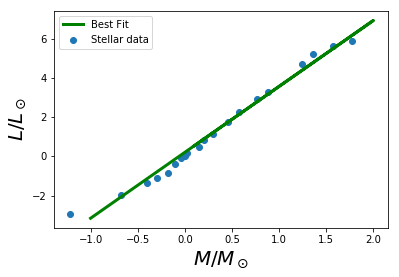

In [40]:
#As a final step we can overplot this on the data. 
#best_fit(x) provides the value of the function at any x value

#define a vector which goes from -1 to in steps of 0.1. 
xplot=[-1,2,0.1]
#Plot
plt.scatter(x,y,label='Stellar data') # plot logM vs. logL
plt.plot(xplot, best_fit(xplot), color='g', linewidth=3,label='Best Fit')
plt.xlabel("$M/M_\odot$", fontsize=20)
plt.ylabel("$L/L_\odot$", fontsize=20)
plt.legend()


# Your Turn  - plotting and fitting#

## Mass-Radius Relation ##
Now plot $\log R/R_\odot$ versus $\log (M/M_\odot)$ for the main sequence stars listed in the Stellar Data sheet. If you assume the relation $R/R\odot= (M/M\odot)^\beta$, then what value of $\beta$ best fits the plotted data? Make sure to make a plot showing both the fit and data.

## Central Temperature and Luminosity ##
Now make use of the constant density approximation which allowed use to derive an equation for the central temperature in a star, estimate the central temperature of the stars (you may assume they all have the same composition as the Sun, i.e. $\mu = 0.6$). Make a plot of the central temperature you calculate against $\log (L/L_/odot)$ and comment on the range of luminisoties and the range of temperatures. 

Astropy has something really helpful here = constants.... so I've got things started by importing some that you will need. 

HINT: pay close attention to units, and to your brackets when coding the formula. 



In [42]:
from astropy.constants import G, k_B, m_p, M_sun, R_sun
print(G, k_B, m_p, M_sun, R_sun)

  Name   = Gravitational constant
  Value  = 6.67408e-11
  Uncertainty  = 3.1e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2014   Name   = Boltzmann constant
  Value  = 1.38064852e-23
  Uncertainty  = 7.9e-30
  Unit  = J / K
  Reference = CODATA 2014   Name   = Proton mass
  Value  = 1.672621898e-27
  Uncertainty  = 2.1e-35
  Unit  = kg
  Reference = CODATA 2014   Name   = Solar mass
  Value  = 1.9884754153381438e+30
  Uncertainty  = 9.236140093538353e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2014   Name   = Nominal solar radius
  Value  = 695700000.0
  Uncertainty  = 0.0
  Unit  = m
  Reference = IAU 2015 Resolution B 3
